In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
import time
from google.colab import drive
drive.mount('/content/drive')
# device='cuda' if torch.cuda.is_available() else 'cpu'
# print(device)
# print(torch.cuda.get_device_name(0))

Mounted at /content/drive


In [2]:
# file_path = 'drive/MyDrive/distribution_system_state_est/test_data/0225/Case_1/'
# file_path = 'drive/MyDrive/distribution_system_state_est/test_data/0506txt/'
file_path = 'drive/MyDrive/distribution_system_state_est/test_data/ieee123/0802_Case2/dv_nonlinear/'

# # node index
# filename = file_path + 'node_idx.txt'
# node_idx = pd.read_table(filename,sep=',',header=None).to_numpy()
# print('node index:',node_idx.shape)


In [3]:
# # W matrix (star communication network) - unweighted Laplacian

# # v = R*-p +X*(q_g - q) + v_0*1
# # v_abs_1, p, q, R_mat, X_mat

# Sphase = 5.1834e+7 / 1000 # kw

# # qg_pred_cvar = np.load(file_path + 'results/qg_pred_cvar_only.npy') # cvar
# qg_pred_cvar = np.load(file_path + 'results/qg_pred_cvar_regularization.npy') # constrained
# qg_pred_mse = np.load(file_path + 'results/qg_pred_regular_mse.npy')
# qg_pred_fcnn = np.load(file_path + 'results/qg_fcnn_pred_regular_mse.npy') # individual fcnn

# qg_true = np.load(file_path + 'Y.npy')

# n_node = np.size(node_idx)
# n_sample = np.size(qg_pred_mse,1)

# qg_pred_cvar = qg_pred_cvar / Sphase # to pu
# qg_pred_mse = qg_pred_mse / Sphase 
# qg_pred_fcnn = qg_pred_fcnn / Sphase 
# # np.save('/content/drive/MyDrive/distribution_system_state_est/test_data/0225/Case_1/results/qg_pred_cvar.npy',arr=y_pred_all)
# print(qg_pred_cvar.shape,qg_pred_mse.shape,qg_true.shape) # 111*14400

In [4]:
# print(R_mat.shape,p.shape,X_mat.shape,q_g.shape,qg_pred_cvar.shape,v_abs_1.shape)

In [5]:
# v_true = np.matmul(R_mat,-p) + np.matmul(X_mat,q_g - q)
# v_0 = v_abs_1 - v_true
# v0 = np.mean(v_0)

# v_gnn = np.matmul(R_mat,-p) + np.matmul(X_mat,qg_pred_cvar[1:,:] - q)
# v_local = np.matmul(R_mat,-p) + np.matmul(X_mat,qg_pred_mse[1:,:] - q)

# dv_pred_cvar = np.load(file_path + 'results/dv_pred_cvar_regularization.npy')
dv_pred_mse = np.loadtxt(file_path + 'dv_mse.txt', delimiter=',')
dv_pred_cvar = np.loadtxt(file_path + 'dv_cvar_qnv.txt', delimiter=',')
# dv_pred_fcnn = np.loadtxt(file_path + 'dv_fcnn.txt', delimiter=',')
dv_pred_fcnn = np.loadtxt(file_path + 'dv_cvar_qnv_sampling3.txt', delimiter=',') # cvar+sampling
dv_opt = np.loadtxt(file_path + 'dv_opt.txt', delimiter=',')

print(dv_pred_cvar.shape,dv_pred_mse.shape,dv_pred_fcnn.shape,dv_opt.shape) # 111*14400

(122, 14211) (122, 14211) (122, 14211) (122, 14211)


In [6]:
n_tot = np.size(dv_pred_cvar)

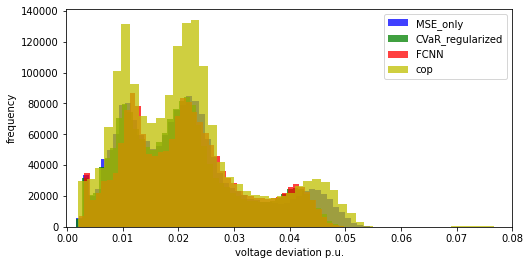

mse: 0.056547 cvar: 0.052771 fcnn: 0.052836 opt: 0.079874


In [7]:
# v01 = np.reshape(v_0,(n_node-1)*n_sample)

# v_true1 = np.reshape(v_true,(n_node-1)*n_sample)
# v_gnn1 = np.reshape(v_gnn,(n_node-1)*n_sample)
# v_local1 = np.reshape(v_local,(n_node-1)*n_sample)

fig1 = plt.figure(figsize=(8,4))
# plt.hist(v01, bins = 100, facecolor='b', alpha=0.75,label = 'v_0')
# plt.hist(np.abs(dv_pred_cvar), bins = 100, facecolor='r', alpha=0.75,label = 'CVaR_constrained')
plt.hist(np.abs(dv_pred_mse.reshape(n_tot)), bins = 50, facecolor='b', alpha=0.75,label = 'MSE_only')
plt.hist(np.abs(dv_pred_cvar.reshape(n_tot)), bins = 50, facecolor='g', alpha=0.75,label = 'CVaR_regularized')
plt.hist(np.abs(dv_pred_fcnn.reshape(n_tot)), bins = 50, facecolor='r', alpha=0.75,label = 'FCNN')
plt.hist(np.abs(dv_opt.reshape(n_tot)), bins = 50, facecolor='y', alpha=0.75,label = 'cop')
plt.legend(loc="upper right")
plt.xlabel('voltage deviation p.u.')
plt.ylabel('frequency')
plt.xlim(-0.0002,0.08)
# plt.title('Histogram of Voltage Deviation')
plt.show()
print('mse:',np.max(np.abs(dv_pred_mse.reshape(n_tot))),
      'cvar:',np.max(np.abs(dv_pred_cvar.reshape(n_tot))),
      'fcnn:',np.max(np.abs(dv_pred_fcnn.reshape(n_tot))),
      'opt:',np.max(np.abs(dv_opt.reshape(n_tot))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and compute

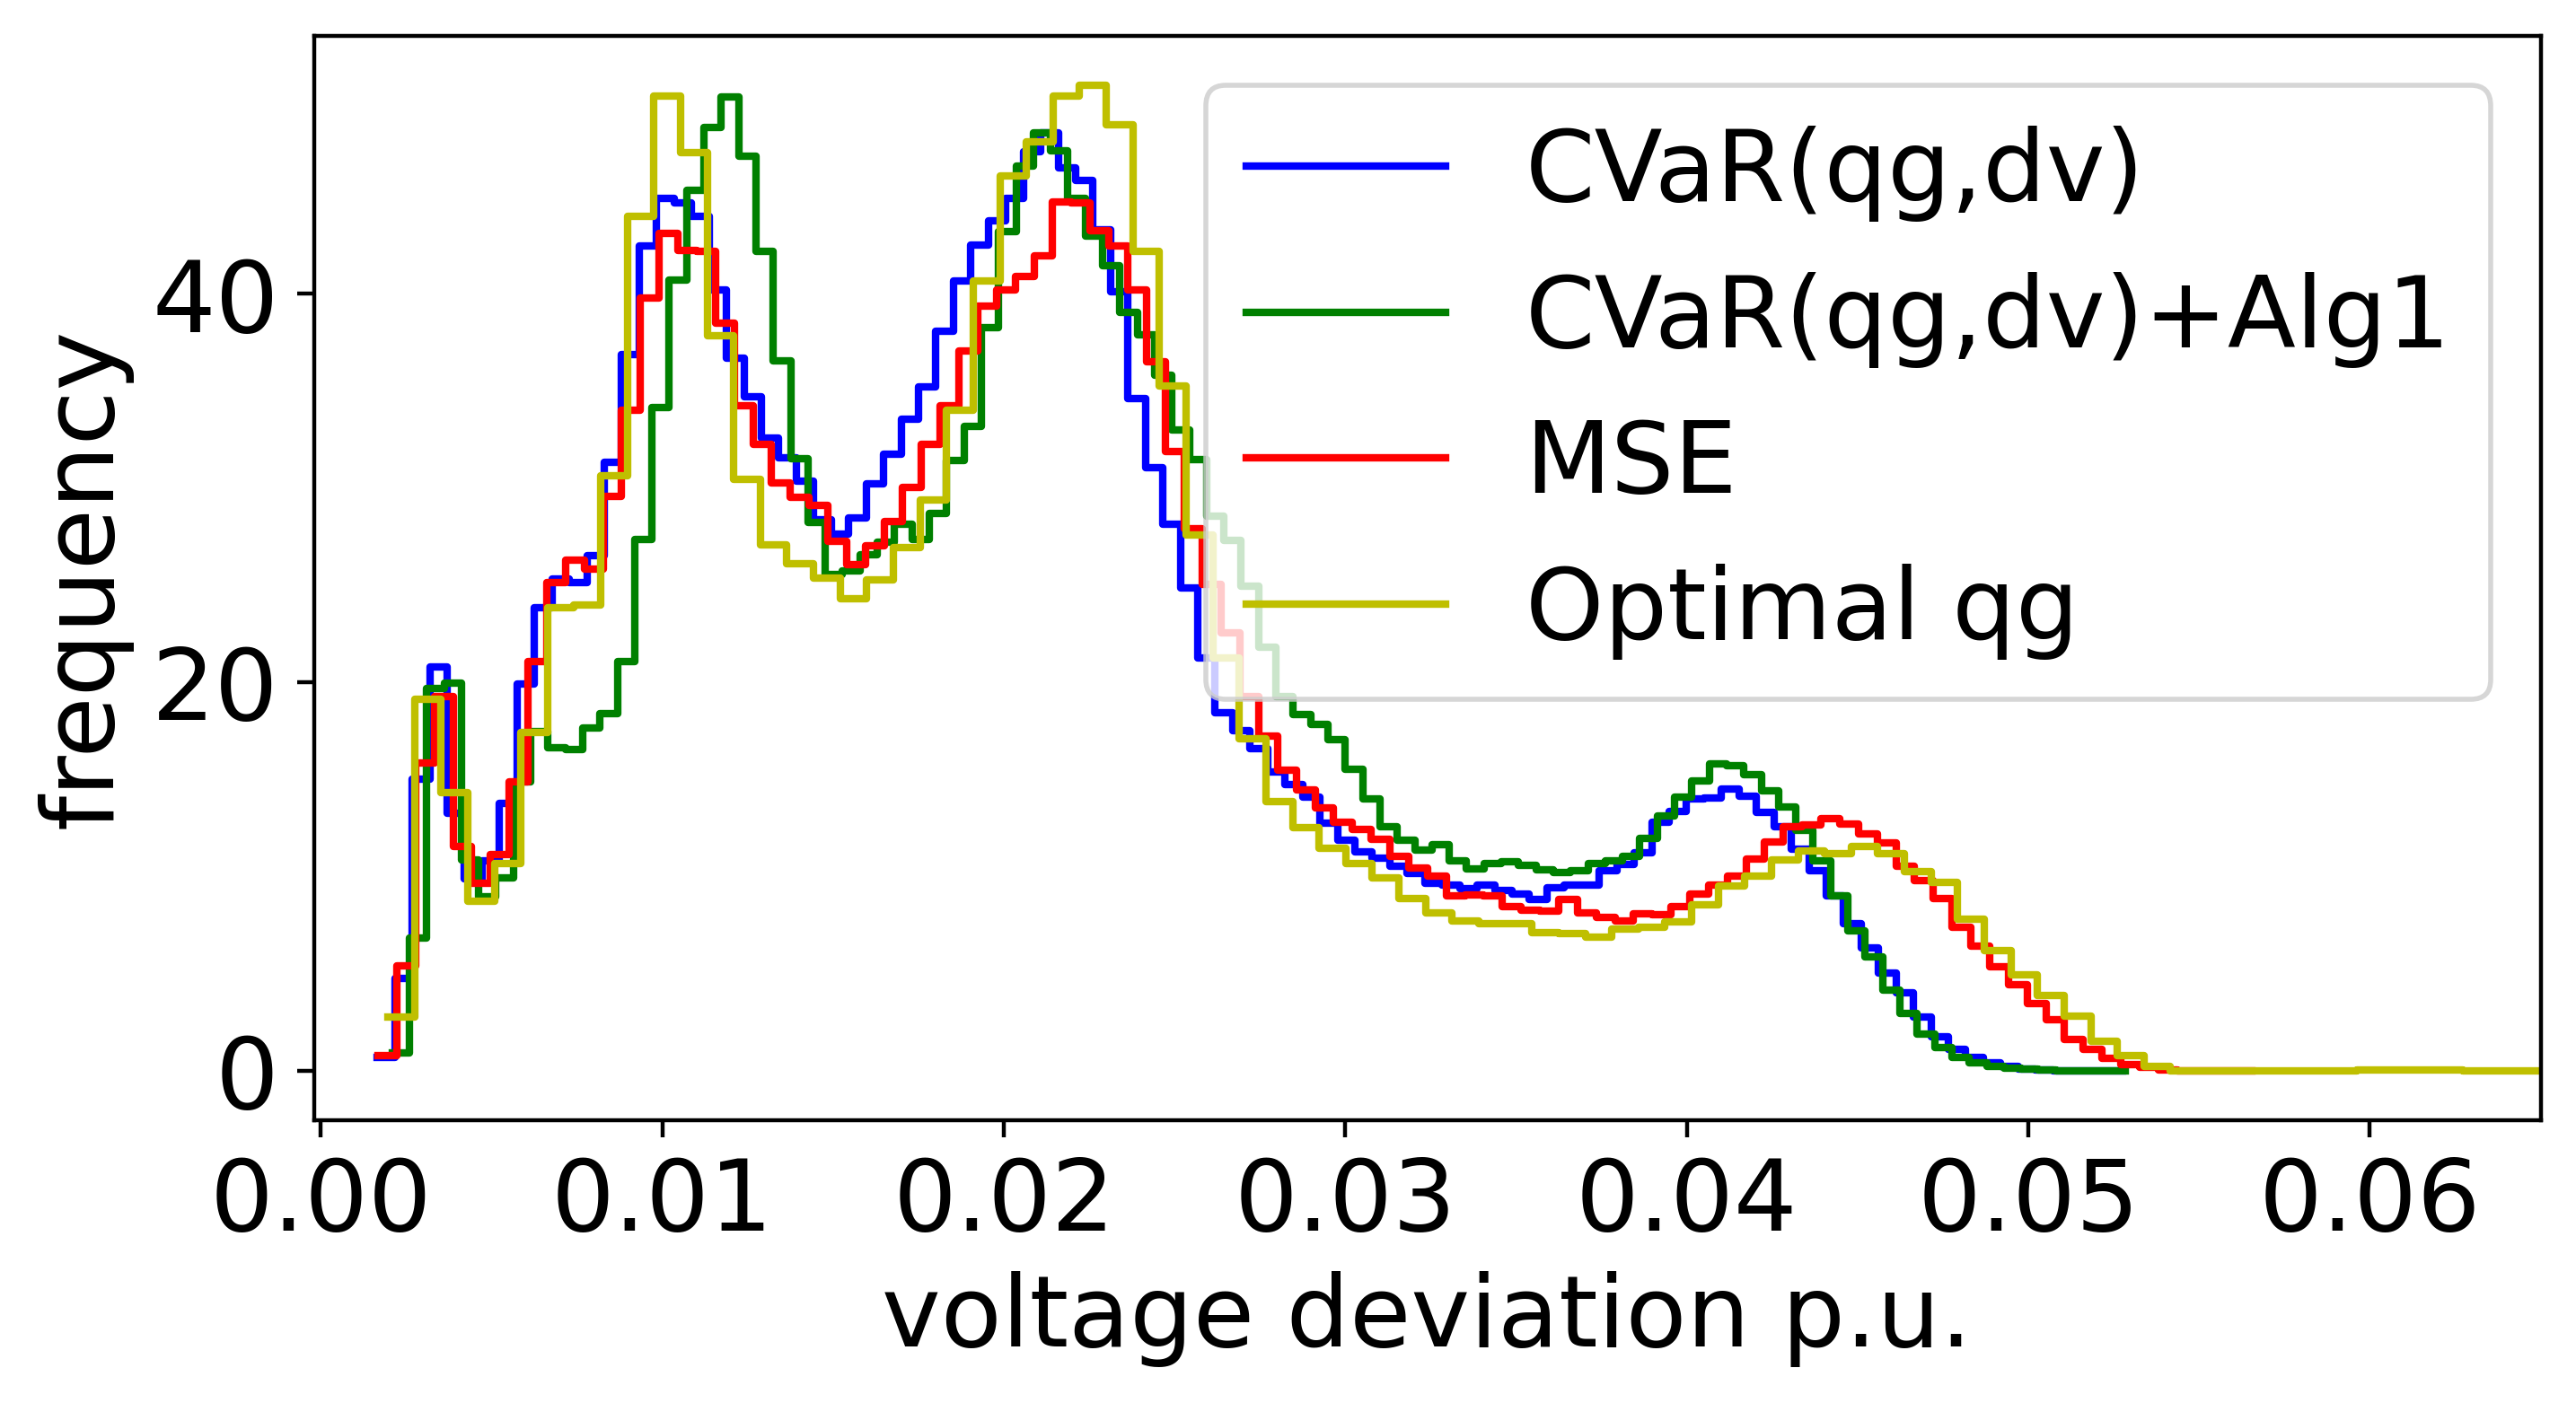

In [19]:
# # CVaR constrained
# bins_cvarcon, edges_cvarcon = np.histogram(np.abs(dv_pred_cvar), 100, normed=1)
# left_cvarcon, right_cvarcon = edges_cvarcon[:-1], edges_cvarcon[1:]
# X_cvarcon = np.array([left_cvarcon, right_cvarcon]).T.flatten()
# Y_cvarcon = np.array([bins_cvarcon, bins_cvarcon]).T.flatten()

# MSE
bins_mse, edges_mse = np.histogram(np.abs(dv_pred_mse), 100, normed=1)
left_mse, right_mse = edges_mse[:-1], edges_mse[1:]
X_mse = np.array([left_mse, right_mse]).T.flatten()
Y_mse = np.array([bins_mse, bins_mse]).T.flatten()

# CVaR loss
bins_cvarloss, edges_cvarloss = np.histogram(np.abs(dv_pred_cvar), 100, normed=1)
left_cvarloss, right_cvarloss = edges_cvarloss[:-1], edges_cvarloss[1:]
X_cvarloss = np.array([left_cvarloss, right_cvarloss]).T.flatten()
Y_cvarloss = np.array([bins_cvarloss, bins_cvarloss]).T.flatten()

# FCNN MSE
bins_fcnn, edges_fcnn = np.histogram(np.abs(dv_pred_fcnn), 100, normed=1)
left_fcnn, right_fcnn = edges_fcnn[:-1], edges_fcnn[1:]
X_fcnn = np.array([left_fcnn, right_fcnn]).T.flatten()
Y_fcnn = np.array([bins_fcnn, bins_fcnn]).T.flatten()

# Optimal
bins_opt, edges_opt = np.histogram(np.abs(dv_opt), 100, normed=1)
left_opt, right_opt = edges_opt[:-1], edges_opt[1:]
X_opt = np.array([left_opt, right_opt]).T.flatten()
Y_opt = np.array([bins_opt, bins_opt]).T.flatten()
 
fig11 = plt.figure(figsize=(8,4),dpi=400)
# plt.hist(v01, bins = 100, facecolor='b', alpha=0.75,label = 'v_0')
plt.plot(X_cvarloss,Y_cvarloss, color='b', label = 'CVaR(qg,dv)')
plt.plot(X_fcnn,Y_fcnn, color='g', label = 'CVaR(qg,dv)+Alg1')
plt.plot(X_mse,Y_mse, color='r', label = 'MSE')
plt.plot(X_opt,Y_opt, color='y', label = 'Optimal qg')
# plt.plot(X_cvarloss,Y_cvarloss, color='g', label = 'CVaR_only')
# plt.hist(np.abs(dv_pred_mse), bins = 100, facecolor='b', alpha=0.75,label = 'MSE_only')
# plt.hist(np.abs(dv0_pred_cvar), bins = 50, facecolor='g', alpha=0.75,label = 'CVaR_loss')
plt.legend(loc="upper right")
plt.xlabel('voltage deviation p.u.')
plt.ylabel('frequency')
plt.xlim(-0.0002,0.065)
# plt.title('Histogram of Voltage Deviation')
plt.show()

In [9]:
# v_err_gnn = v_true - v_gnn
# v_err_gnn_l2 = np.zeros(n_sample)
# v_err_gnn_linf = np.zeros(n_sample)
# v_err_loc = v_true - v_local
# v_err_loc_l2 = np.zeros(n_sample)
# v_err_loc_linf = np.zeros(n_sample)
# for i in range(n_sample):
#   v_err_gnn_l2[i] = np.linalg.norm(v_err_gnn[:,i])/np.linalg.norm(v_true[:,i])
#   v_err_loc_l2[i] = np.linalg.norm(v_err_loc[:,i])/np.linalg.norm(v_true[:,i])
#   v_err_gnn_linf[i] = np.max(np.abs(v_err_gnn)) / np.max(np.abs(v_true[:,i]))
#   v_err_loc_linf[i] = np.max(np.abs(v_err_loc)) / np.max(np.abs(v_true[:,i]))

# print('GNN mean err:',np.mean(v_err_gnn_l2))
# print('Local mean err:',np.mean(v_err_loc_l2))
# print((1-np.mean(v_err_gnn_l2)/np.mean(v_err_loc_l2))*100,'% reduced')
# print('GNN mean err inf:',np.mean(v_err_gnn_linf))
# print('Local mean err inf:',np.mean(v_err_loc_linf))

# fig1 = plt.figure(figsize=(4,4))
# # plt.hist(v01, bins = 100, facecolor='b', alpha=0.75,label = 'v_0')
# plt.hist(v_err_gnn_l2, bins = 50, facecolor='b', alpha=0.75,label = 'V_gnn')
# plt.hist(v_err_loc_l2, bins = 50, facecolor='g', alpha=0.75,label = 'V_local')
# plt.legend(loc="upper right")
# plt.xlabel('relative error')
# plt.ylabel('frequency')
# plt.title('Histogram of Voltage Deviation error')
# plt.show()

In [10]:
# path='/content/drive/MyDrive/distribution_system_state_est/test_data/0225/Case_1/results/'
# np.savetxt(path+'dv_gnn.csv', v_gnn, delimiter=',')
# np.savetxt(path+'dv_local.csv', v_local, delimiter=',')
# np.savetxt(path+'dv_true.csv', v_true, delimiter=',')
# # pd.DataFrame(v_gnn).to_csv(path+'dv_gnn.csv')

# q_g error

In [11]:
# qg_gnn_l2 = np.load('/content/drive/MyDrive/distribution_system_state_est/test_data/0225/Case_1/results/qg_err_l2.npy')
# qg_gnn_linf = np.load('/content/drive/MyDrive/distribution_system_state_est/test_data/0225/Case_1/results/qg_err_linf.npy')
# qg_local_l2 = np.load('/content/drive/MyDrive/distribution_system_state_est/test_data/0225/Case_1/results/qg_err_l2_local.npy')
# qg_local_linf = np.load('/content/drive/MyDrive/distribution_system_state_est/test_data/0225/Case_1/results/qg_err_linf_local.npy')

# print('GNN l2:',np.mean(qg_gnn_l2),' L_inf:',np.mean(qg_gnn_linf))
# print('Local l2:',np.mean(qg_local_l2),' L_inf:',np.mean(qg_local_linf))

# fig3 = plt.figure(figsize=(6,6))
# plt.rcParams.update({'font.size': 20})
# # plt.hist(v01, bins = 100, facecolor='b', alpha=0.75,label = 'v_0')
# plt.hist(qg_gnn_l2, bins = 50, facecolor='b', alpha=0.75,label = 'gnn')
# # plt.hist(qg_gnn_linf, bins = 50, facecolor='y', alpha=0.75,label = 'gnn l_inf')
# plt.hist(qg_local_l2, bins = 50, facecolor='g', alpha=0.75,label = 'local')
# # plt.hist(qg_local_linf, bins = 50, facecolor='g', alpha=0.75,label = 'local l_inf')
# plt.legend(loc="upper right")
# plt.xlabel('relative l_2 error')
# plt.ylabel('frequency')
# # plt.title('Histogram of Reactive Injection Error')
# plt.show()

In [12]:
# print(qg_gnn_l2.shape,qg_local_l2.shape)

In [13]:

# print(node_idx)
# np.max(local_err_node-fcnn_err_node_cvar_only)
# print(qg_pred_mse.shape,qg_pred_fcnn.shape)
# print(np.max(qg_pred_mse - qg_pred_fcnn))
# qg_pred_cvar.shape

[0.03089993 0.0344487  0.03530662 0.04663738 0.05193921]


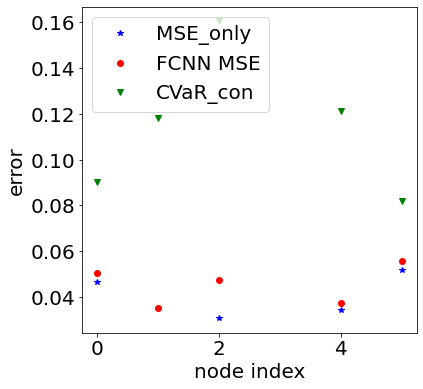

In [14]:
# qg_pred_cvar = np.load('/content/drive/MyDrive/distribution_system_state_est/test_data/0225/Case_2/results/qg_err_full.npy')
# qg_pred_mse = np.load('/content/drive/MyDrive/distribution_system_state_est/test_data/0225/Case_2/results/qg_err_full_local.npy')
# print('GNN l2:',np.mean(qg_gnn_l2),' L_inf:',np.mean(qg_gnn_linf))
# print('Local l2:',np.mean(qg_local_l2),' L_inf:',np.mean(qg_local_linf))

# qg_pred_cvar = (qg_pred_cvar - qg_true) / (Sphase * 1000)
# qg_pred_mse = (qg_pred_mse - qg_true) / (Sphase * 1000)

file_path1 = 'drive/MyDrive/distribution_system_state_est/test_data/ieee123/0802_Case2/'

# qg_pred_cvar = np.load(file_path + 'results/qg_err_test_cvar.npy')
qg_pred_mse = np.load(file_path1 + 'results/qg_err_mse.npy')
qg_pred_cvar_only = np.load(file_path1 + 'results/qg_err_cvar_qnv.npy')
qg_pred_fcnn = np.load(file_path1 + 'results/qg_err_cvar_qnv_sampling.npy') # cvar+sampling

Sphase = 5.1834e+7 / 1000

qg_pred_cvar = (qg_pred_cvar_only - 0) / (Sphase * 1)
qg_pred_mse = (qg_pred_mse - 0) / (Sphase * 1)
qg_pred_fcnn = (qg_pred_fcnn - 0) / (Sphase * 1)
qg_pred_cvar_only = (qg_pred_cvar_only - 0) / (Sphase * 1)

n_node = 6
gnn_err_node = np.zeros(n_node)
local_err_node = np.zeros(n_node)
gnn_err_node_mean = np.zeros(n_node)
local_err_node_mean = np.zeros(n_node)
gnn_err_node_var = np.zeros(n_node)
local_err_node_var = np.zeros(n_node)

gnn_err_node_cvar_only = np.zeros(n_node)
gnn_err_node_mean_cvar_only = np.zeros(n_node)
gnn_err_node_var_cvar_only = np.zeros(n_node)

fcnn_err_node = np.zeros(n_node)
fcnn_err_node_mean = np.zeros(n_node)
fcnn_err_node_var = np.zeros(n_node)

for i in range(n_node):
  gnn_err_node[i] = np.linalg.norm(qg_pred_cvar[i+0,:] )
  local_err_node[i] = np.linalg.norm(qg_pred_mse[i+0,:] )
  gnn_err_node_mean[i] = np.mean(np.abs(qg_pred_cvar[i+0,:]))
  local_err_node_mean[i] = np.mean(np.abs(qg_pred_mse[i+0,:]))
  gnn_err_node_var[i] = np.sqrt(np.var(np.abs(qg_pred_cvar[i+0,:])))
  local_err_node_var[i] = np.sqrt(np.var(np.abs(qg_pred_mse[i+0,:])))

  gnn_err_node_cvar_only[i] = np.linalg.norm(qg_pred_cvar_only[i+0,:] )
  gnn_err_node_mean_cvar_only[i] = np.mean(np.abs(qg_pred_cvar_only[i+0,:]))
  gnn_err_node_var_cvar_only[i] = np.sqrt(np.var(np.abs(qg_pred_cvar_only[i+0,:])))

  fcnn_err_node[i] = np.linalg.norm(qg_pred_fcnn[i+0,:] )
  fcnn_err_node_mean[i] = np.mean(np.abs(qg_pred_fcnn[i+0,:]))
  fcnn_err_node_var[i] = np.sqrt(np.var(np.abs(qg_pred_fcnn[i+0,:])))

# sorting out the nodes w/out q_g
list_test = np.argsort(local_err_node)
print(local_err_node[list_test[-10:-1]])

fig3 = plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 20})
# plt.hist(gnn_err_node, bins = 10, facecolor='b', alpha=0.75,label = 'gnn')
# plt.hist(local_err_node, bins = 10, facecolor='g', alpha=0.75,label = 'local')[0:20]
# plt.plot(list_test[-20:-1],gnn_err_node[list_test[-20:-1]], 'ro', label = 'CVaR_con')
plt.plot(list_test[-20:-1],local_err_node[list_test[-20:-1]], 'b*', label = 'MSE_only')
plt.plot(list_test[-20:-1],fcnn_err_node[list_test[-20:-1]], 'ro', label = 'FCNN MSE')
plt.plot(list_test[-20:-1],gnn_err_node_cvar_only[list_test[-20:-1]], 'gv', label = 'CVaR_con')
# plt.plot(gnn_err_node, 'ro', label = 'V_gnn')
# plt.plot(local_err_node, 'b*', label = 'V_local')
plt.legend(loc="upper left")
# plt.xlabel('nodal error')
# plt.ylabel('frequency')
plt.xlabel('node index')
plt.ylabel('error')
# plt.title('Histogram of Reactive Injection Error')
plt.show()

In [15]:
local_err_node

array([0.04663738, 0.03530662, 0.03089993, 0.05308175, 0.0344487 ,
       0.05193921])

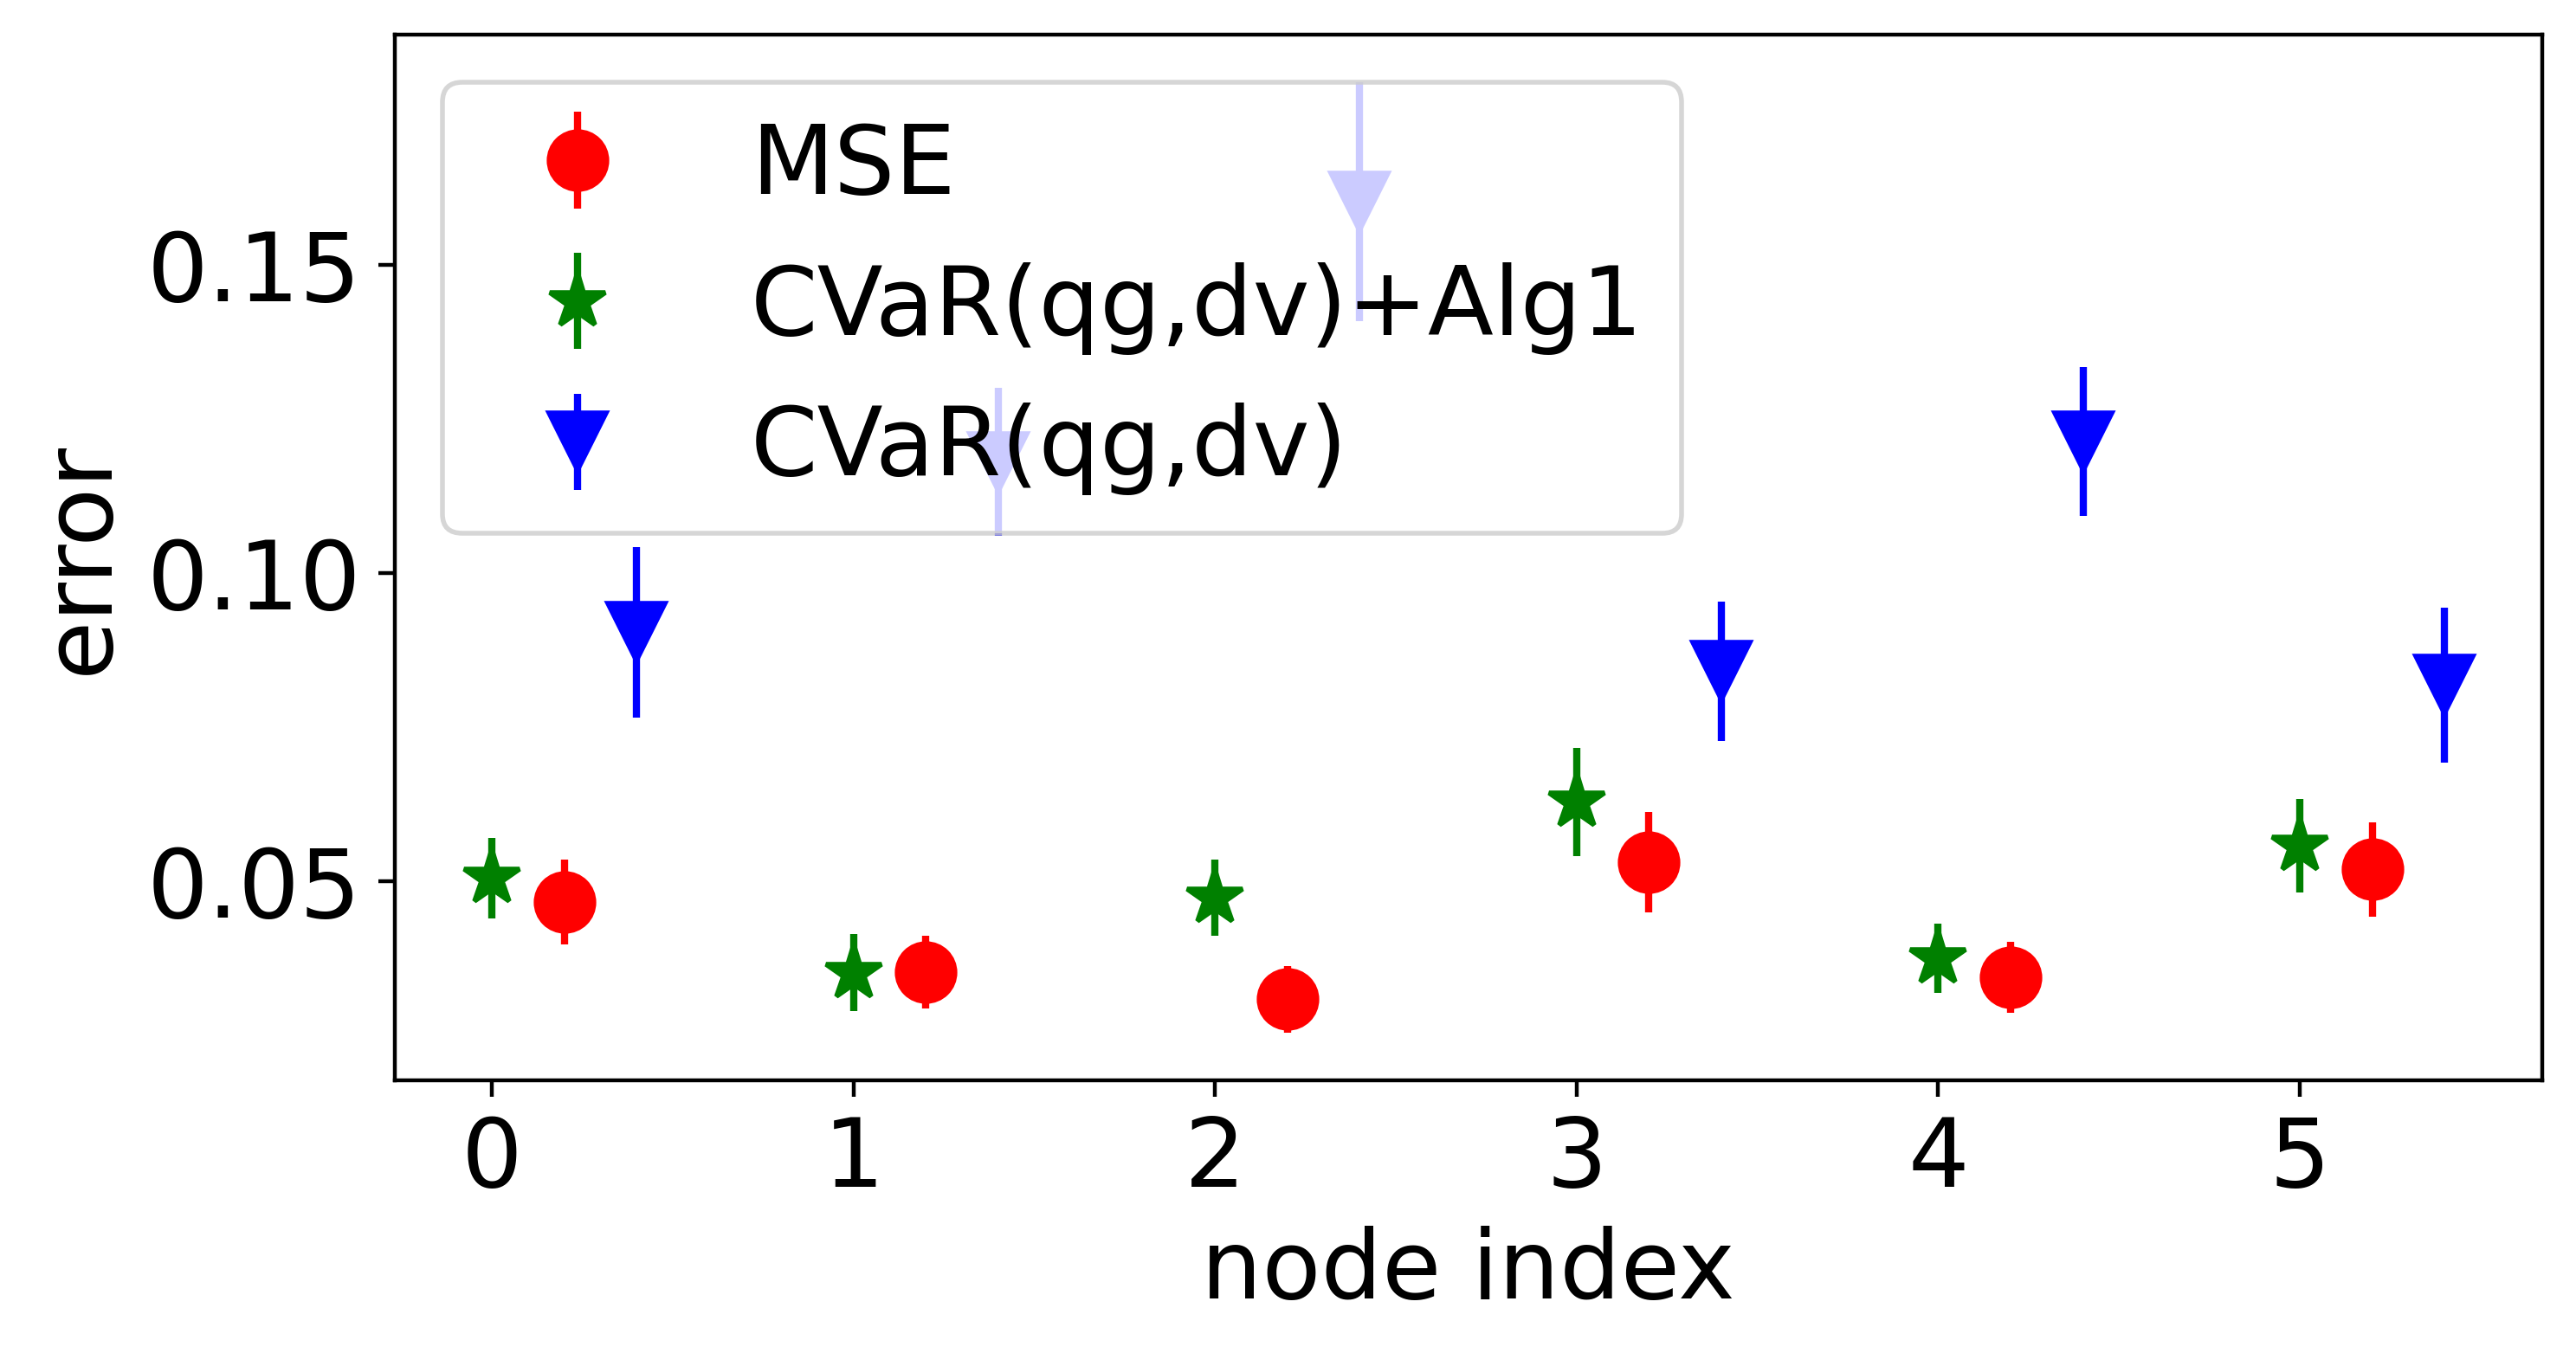

In [16]:
#  - gnn_err_node + local_err_node > 0.05
# bar_idx = [5,6,27,31,32,37,40]
bar_idx = list_test[-20:-1]
bar_idx = np.arange(6)
bar_idx1 = np.asarray(bar_idx) + .2

index1 = np.arange(19) + 1
index1 = bar_idx
index2 = index1 + 0.2
index3 = index1 + 0.4

node_range = np.arange(n_node)+1

fig5 = plt.figure(figsize=(8,4),dpi=400)
# plt.yscale('log')
# plt.errorbar(index2, local_err_node_mean[bar_idx]*10,  yerr=[local_err_node_var[bar_idx]*3, local_err_node_var[bar_idx]*3], color='r', fmt='o', label = 'MSE_only', ms=12)
# plt.errorbar(index1, fcnn_err_node_mean[bar_idx]*10, yerr=[fcnn_err_node_var[bar_idx]*3, fcnn_err_node_var[bar_idx]*3], color='b', fmt='*', label = 'FCNN MSE', ecolor='b', ms=12)
# plt.errorbar(index3, gnn_err_node_mean_cvar_only[bar_idx]*10, yerr=[gnn_err_node_var_cvar_only[bar_idx]*3, gnn_err_node_var_cvar_only[bar_idx]*3], color='g', fmt='v', label = 'CVaR_con', ecolor='b', ms=12)
plt.errorbar(index2, local_err_node[bar_idx]*1,  yerr=[local_err_node_var[bar_idx]*30, local_err_node_var[bar_idx]*30], color='r', fmt='o', label = 'MSE', ms=12)
plt.errorbar(index1, fcnn_err_node[bar_idx]*1, yerr=[fcnn_err_node_var[bar_idx]*30, fcnn_err_node_var[bar_idx]*30], color='g', fmt='*', label = 'CVaR(qg,dv)+Alg1', ecolor='g', ms=12)
plt.errorbar(index3, gnn_err_node_cvar_only[bar_idx]*1, yerr=[gnn_err_node_var_cvar_only[bar_idx]*30, gnn_err_node_var_cvar_only[bar_idx]*30], color='b', fmt='v', label = 'CVaR(qg,dv)', ecolor='b', ms=12)
plt.legend(loc="upper left")
plt.xlabel('node index')
plt.ylabel('error')
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


# plt.title('Voltage Deviation Nodal Error')
plt.show()



In [17]:
# - gnn_err_node + local_err_node > 0.05
index1

array([0, 1, 2, 3, 4, 5])

In [18]:
err1 = np.mean(local_err_node[bar_idx]) # mse
err2 = np.mean(fcnn_err_node[bar_idx]) # cvar sampling
err3 = np.mean(gnn_err_node_cvar_only[bar_idx]) # cvar
print(err1,err2,err3)

0.04205226520855839 0.048234946481865666 0.10931756446794487
